<a href="https://colab.research.google.com/github/awl-shubham-mawa/AWL-Internship/blob/master/MixMatch/Colab%20Notebooks/Extra%20Experimentation/Augmentation_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import sys
import math

import torchvision
from torchvision import models
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchsummary import summary

from torchvision import transforms
from PIL import Image
import torchvision.transforms.functional as TF

import matplotlib.pyplot as plt

In [2]:
trainset = torchvision.datasets.CIFAR10(root = './data', train=True, transform = transforms.ToTensor(), download=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1)

Extracting ./data/cifar-10-python.tar.gz to ./data


torch.Size([3, 32, 32])


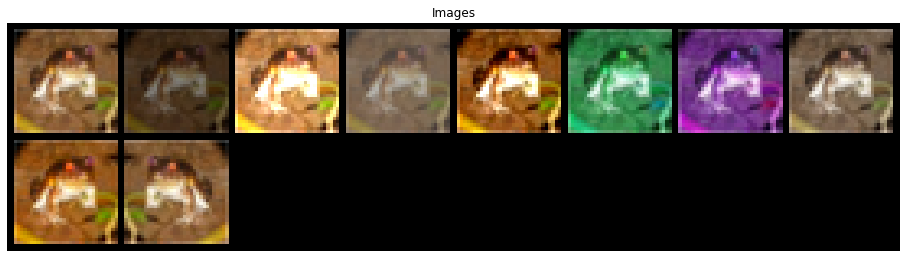

tensor([6])


In [3]:
def imshow(img, title):
    '''Function imshow: Helper function to display an image'''
    batch_size = 1
    plt.figure(figsize=(batch_size * 16, 8))
    plt.axis('off')
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.title(title)
    plt.show()

def show_batch_images(dataloader):
    '''Function show_batch_images: Helper function to display images with their true ages'''
    images, target = next(iter(dataloader))
    
    print(np.shape(images[0]))
    # Functional transforms
    images_t = TF.to_pil_image(images[0])
    # Adjust brightness
    images_tranform_1 = TF.to_tensor(TF.adjust_brightness(images_t, 0.5))
    images_tranform_2 = TF.to_tensor(TF.adjust_brightness(images_t, 1.5))
    
    # Adjust contrast
    images_tranform_3 = TF.to_tensor(TF.adjust_contrast(images_t, 0.5))
    images_tranform_4 = TF.to_tensor(TF.adjust_contrast(images_t, 1.5))

    # Adjust hue
    images_tranform_5 = TF.to_tensor(TF.adjust_hue(images_t, 0.3))
    images_tranform_6 = TF.to_tensor(TF.adjust_hue(images_t, -0.3))

    # Adjust saturation
    images_tranform_7 = TF.to_tensor(TF.adjust_saturation(images_t, 0.5))
    images_tranform_8 = TF.to_tensor(TF.adjust_saturation(images_t, 1.5))

    # Horizontal flip
    images_tranform_9  = TF.to_tensor(TF.hflip(images_t))

    img_list = [images[0], images_tranform_1, images_tranform_2, images_tranform_3,
                images_tranform_4, images_tranform_5, images_tranform_6, images_tranform_7,
                images_tranform_8, images_tranform_9]
    img = torchvision.utils.make_grid(img_list)
    # img_t1 = torchvision.utils.make_grid(images_tranform_1)
    # img_t2 = torchvision.utils.make_grid(images_tranform_2)
    # img_t3 = torchvision.utils.make_grid(images_tranform_3)
    # img_t4 = torchvision.utils.make_grid(images_tranform_4)
    
    imshow(img, title = 'Images')
    print(target)
    # imshow(img_t1, title = 'Brightness 0.5')
    # imshow(img_t2, title = 'Brightness 1.5')
    # imshow(img_t3, title = 'Contrast 0.5')
    # imshow(img_t4, title = 'Contrast 0.5')

    return images, target
images, target = show_batch_images(trainloader)

In [16]:
custom_transform = transforms.Compose([transforms.ColorJitter(brightness=(0.5,1.5), contrast=(0.5,1.5), saturation=(0.5,1.5)),
                                       transforms.RandomHorizontalFlip(0.5),
                                       transforms.RandomRotation((-10,10)),
                                       transforms.Resize((32,32))])

In [17]:
print(type(images))
print(np.shape(images[0]))

<class 'torch.Tensor'>
torch.Size([3, 32, 32])


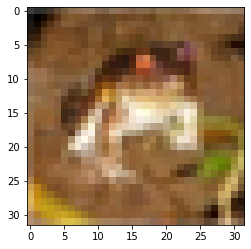

In [46]:
img = images[0]
img_1 = custom_transform(TF.to_pil_image(img))
img = np.transpose(img, (1,2,0))
img_1 = np.transpose(img_1, (0,1,2))
img_grid = torchvision.utils.make_grid(img,img_1)
plt.imshow(img)

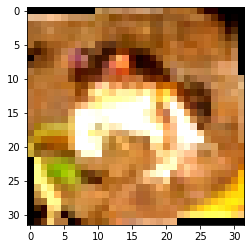

In [47]:
plt.imshow(img_1)